<a href="https://colab.research.google.com/github/JuneWayne/DS3021-Clustering/blob/main/assignment/Ethan_Cao_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [47]:
# 1
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

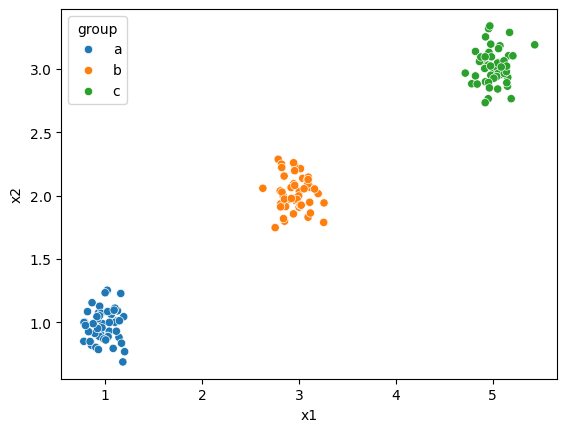

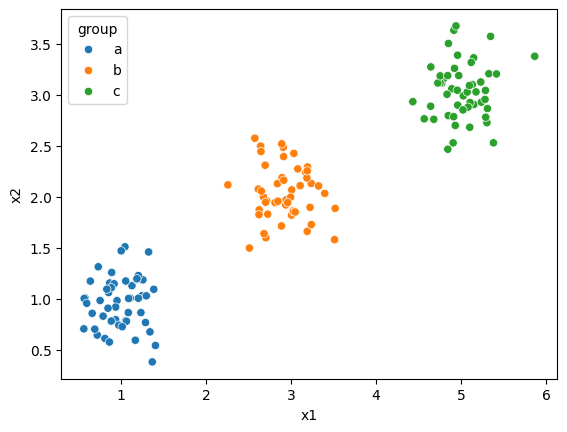

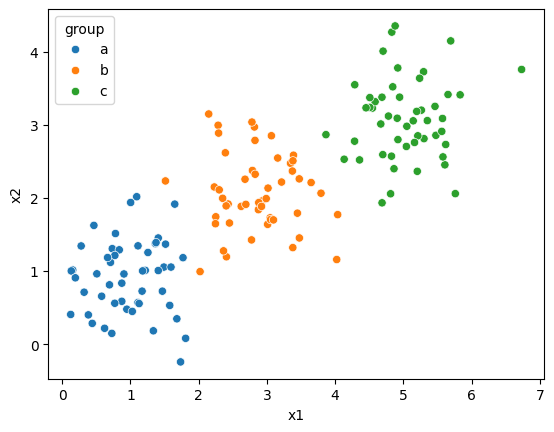

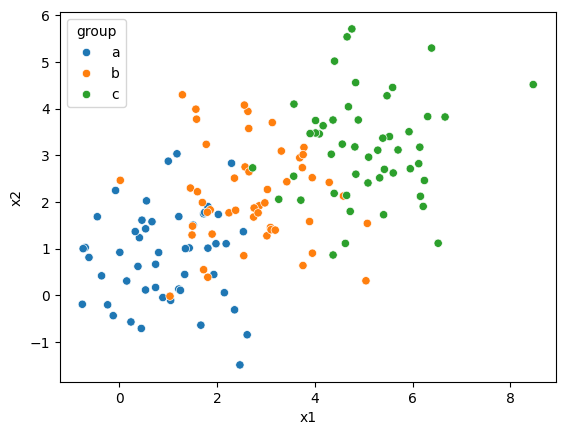

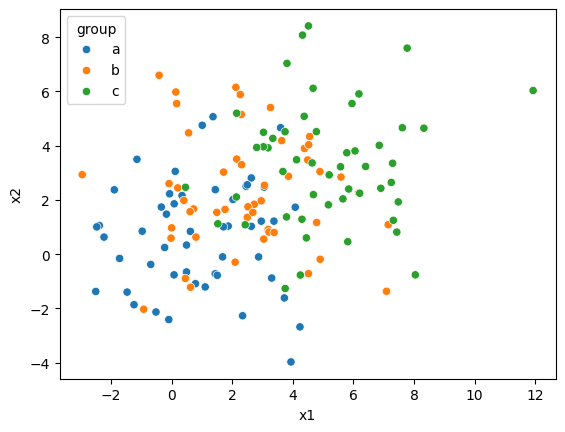

In [48]:
# 2
import seaborn as sns
import matplotlib.pyplot as plt
df_lists = [df0_125,df0_25,df0_5,df1_0,df2_0]
df_names = ['df0_125','df0_25','df0_5','df1_0','df2_0']
for df in df_lists:
    sns.scatterplot(data=df,x='x1',y='x2',hue='group')
    plt.show()

## As noise goes up, the visual distinctiveness of the clusters worsened, as the scatter points starts to become 'loosely' clustered with members of its own group, and proceeds to move away from a close-knit cluster and integrate with points from other clusters.

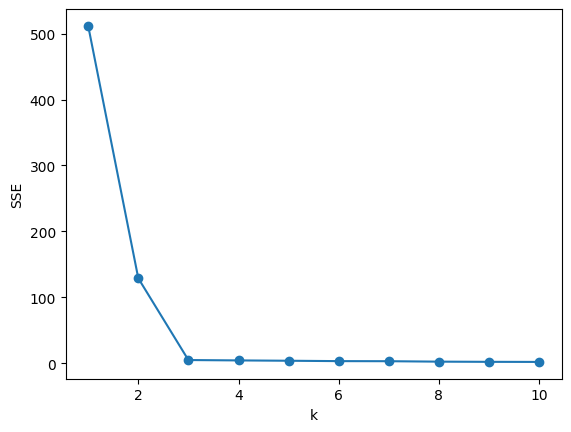

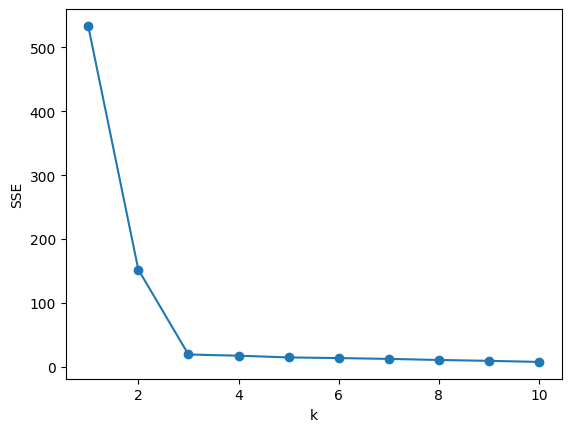

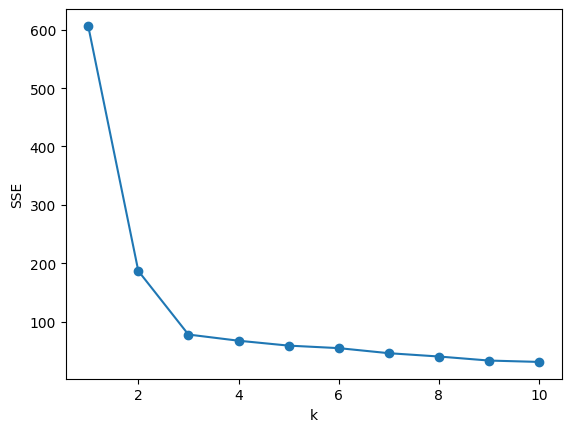

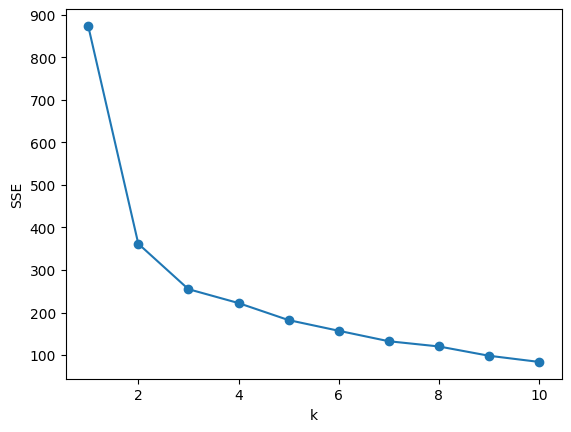

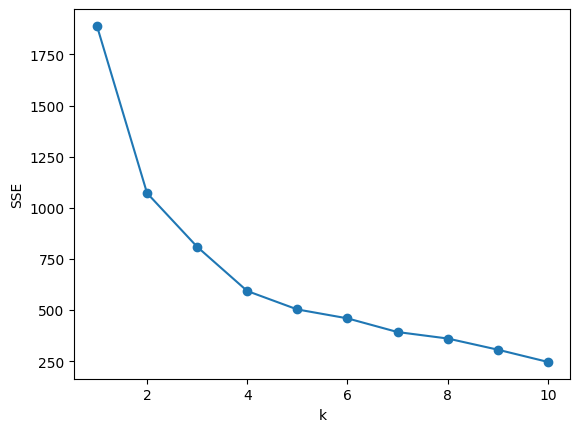

In [49]:
# 3
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def screePlot(df):
    X = df[['x1','x2']].to_numpy()
    sse = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters=k).fit(X)
        sse.append(kmeans.inertia_)

    plt.plot(range(1,11),sse,marker='o')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.show()
screePlot(df0_125)
screePlot(df0_25)
screePlot(df0_5)
screePlot(df1_0)
screePlot(df2_0)


## as the noise of the data increases, the visibility of the elbow point, or the distinctivenss of the elbow point becomes less apparent. At the start, with minimal noise level, the elbow point can be directly spotted at the point of which k is equals to 3. When the noise level gets to the maximum at the end, the elbow point is barely distinguishable from the rest of the parts of the graph as the line graph smoothens into a decreasing exponential curve.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [50]:
# 1
election_df = pd.read_csv('2022 election cycle fundraising.csv')
election_df.head()
election_var_clean = ['Raised', 'Spent', 'Cash on Hand', 'Debts']
election_df[election_var_clean] = election_df[election_var_clean].replace({'\$': '', ',': ''}, regex=True).apply(pd.to_numeric)
election_df

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396,7449678,851851,0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741,1243502,2472888,0
2,2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0
3,3,Adam Smith,Democratic,Washington,House,1211111,1173466,623472,0
4,4,Adrian Smith,Republican,Nebraska,House,1617611,1664674,1098579,0
...,...,...,...,...,...,...,...,...,...
532,532,William Timmons,Republican,South Carolina,House,892064,823955,76799,391742
533,533,Young Kim,Republican,California,House,7900497,7380035,928803,94940
534,534,Yvette Clarke,Democratic,New York,House,684268,662375,93513,49480
535,535,Yvette Herrell,Republican,New Mexico,House,3777731,2746661,1085613,0


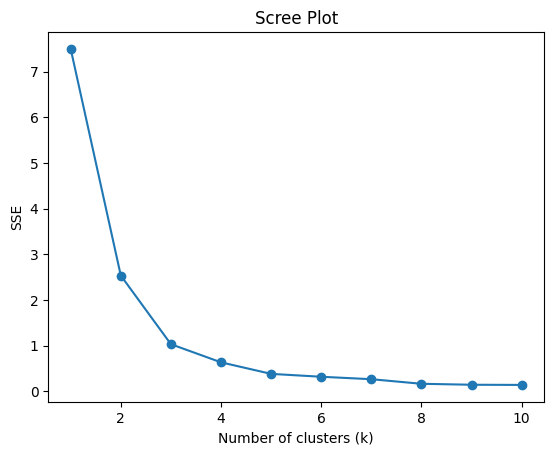

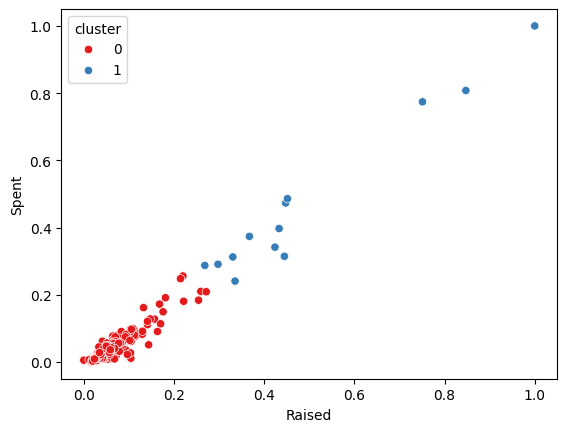

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,cluster


In [51]:
# 2
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
scaler = MinMaxScaler()
election_df_scaled = election_df.copy()
election_df_scaled[election_var_clean] = scaler.fit(election_df_scaled[election_var_clean]).transform(election_df[election_var_clean])

def scree_plot(df, features, k=10):
    X = df[features].values
    sse = []
    for k in range(1, k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)

    plt.plot(range(1, k + 1), sse, marker='o')
    plt.title('Scree Plot')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('SSE')
    plt.show()

scree_plot(election_df_scaled, ['Raised', 'Spent'], k=10)

kmeans = KMeans(n_clusters=2)
X = election_df_scaled[['Raised', 'Spent']]
clusters = kmeans.fit_predict(X)
election_df_scaled['cluster'] = clusters
sns.scatterplot(
    data=election_df_scaled,
    x='Raised',
    y='Spent',
    hue='cluster',
    palette='Set1'
)
plt.xlabel('Raised')
plt.ylabel('Spent')
plt.show()

cluster_counts = election_df_scaled['cluster'].value_counts()
smallest_cluster = cluster_counts.idxmin()
smallest_df = election_df_scaled[election_df_scaled['cluster'] == smallest_cluster]
smallest_df.head(0)

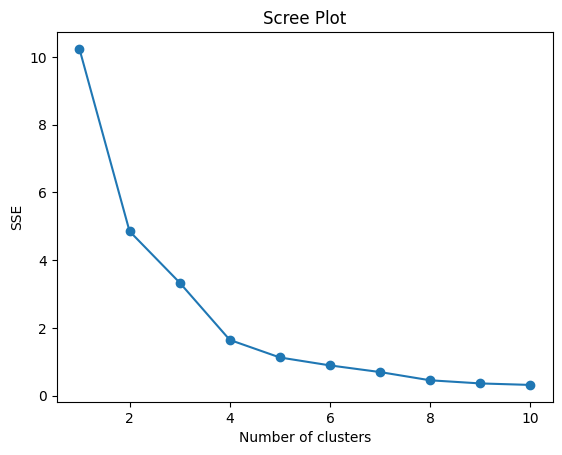

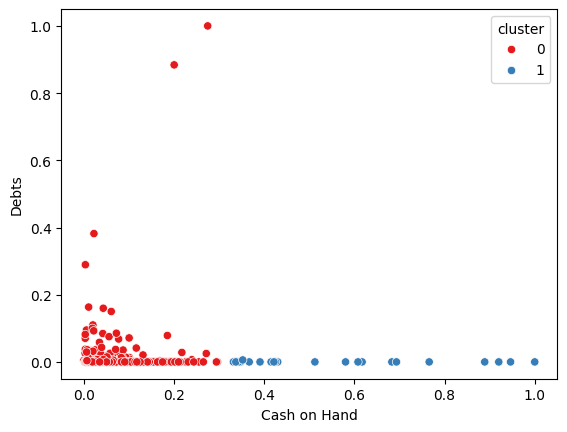

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,cluster
2,2,Adam Schiff,Democratic,California,House,0.254404,0.183753,0.920268,0.000000,1
11,11,Alex Padilla,Democratic,California,Senate,0.143690,0.050960,0.336539,0.000429,1
45,45,Bernie Sanders,Independent,Vermont,Senate,0.175760,0.149177,0.429999,0.000000,1
89,89,Chuck Schumer,Democratic,New York,Senate,0.423863,0.341554,0.889092,0.000000,1
112,112,Cory Booker,Democratic,New Jersey,Senate,0.081631,0.052799,0.338877,0.000000,1


In [52]:
def scree_plot(df, features, k=10):
    X = df[features].values
    sse = []
    for k in range(1, k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)

    plt.plot(range(1, k + 1), sse, marker='o')
    plt.title('Scree Plot')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.show()

scree_plot(election_df_scaled, ['Cash on Hand', 'Debts'], k=10)

kmeans = KMeans(n_clusters=2)
X = election_df_scaled[['Cash on Hand', 'Debts']]
clusters = kmeans.fit_predict(X)
election_df_scaled['cluster'] = clusters
sns.scatterplot(
    data=election_df_scaled,
    x='Cash on Hand',
    y='Debts',
    hue='cluster',
    palette='Set1'
)
plt.xlabel('Cash on Hand')
plt.ylabel('Debts')
plt.show()

cluster_counts = election_df_scaled['cluster'].value_counts()
smallest_cluster = cluster_counts.idxmin()
smallest_df = election_df_scaled[election_df_scaled['cluster'] == smallest_cluster]
smallest_df.head()

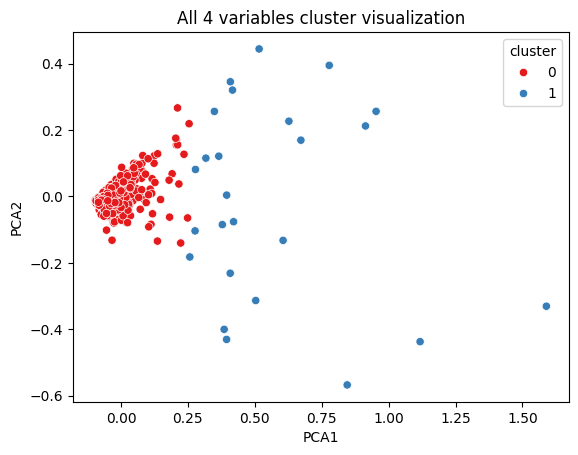

In [55]:
# 4

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(election_df_scaled[['Raised','Spent','Cash on Hand', 'Debts']])
election_df_scaled['PCA1'] = pca_components[:, 0]
election_df_scaled['PCA2'] = pca_components[:, 1]

sns.scatterplot(
    data=election_df_scaled,
    x='PCA1',
    y='PCA2',
    hue='cluster',
    palette='Set1'
)
plt.title("All 4 variables cluster visualization")
plt.show()

## By reducing the dimension on 4 variables with PCA onto a 2D graph, it shows us that there's a large group of clusters that shares similar financial patterns in terms of budget raised, spent, cash on hands, and debt, while there are several outlier candidates that goes to the extreme with certain variables.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?